In [3]:
#imports
import pandas as pd #Python data analysis library
import numpy as np #Python scientific computing
import matplotlib.pyplot as plt #For plotting
import matplotlib.mlab as mlab
import seaborn as sns #Python visualization library
from scipy.optimize import curve_fit
from IPython.display import display, HTML

#Plots inline
%matplotlib inline

In [5]:
#import dataset
trainDf = pd.read_csv("desktop/data/raw/order_products__train.csv")
orderDf = pd.read_csv("desktop/data/raw/orders.csv")
depDf = pd.read_csv("desktop/data/raw/departments.csv")
aisleDf = pd.read_csv("desktop/data/raw/aisles.csv")
productDf = pd.read_csv("desktop/data/raw/products.csv")

In [6]:
orderDf.shape

(3421083, 7)

In [7]:
productDf.shape

(49688, 4)

C:\Users\abhig\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


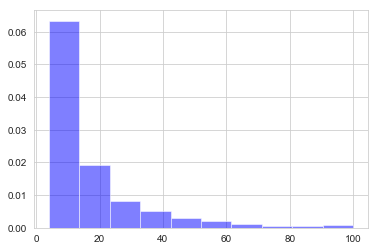

In [8]:
#get distribution of number of orders per customer
sns.set_style('whitegrid')
customerNumOrderFrame = orderDf.groupby("user_id",as_index = False)["order_number"].max()
num_bins = 10
n, bins, patches = plt.hist(customerNumOrderFrame["order_number"] , num_bins, normed=1, color='blue', alpha=0.5)
mu = customerNumOrderFrame["order_number"].mean()
sigma = customerNumOrderFrame["order_number"].std()

C:\Users\abhig\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Number of Orders per Customer Distribution')

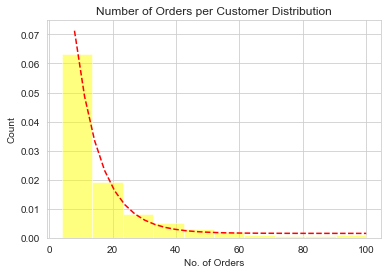

In [9]:
n, bins, patches = plt.hist(customerNumOrderFrame["order_number"] , num_bins, normed=1, facecolor='yellow', alpha=0.5)

bins = np.delete(bins,10) #to make dimensions of x & y axis values equal
bins = bins+5 #to ge the central value of each bar

def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c

popt, pcov = curve_fit(exponenial_func, bins, n, p0=(1, 1e-6, 1))

xx = np.linspace(8, 100, 30)
yy = exponenial_func(xx, *popt)

plt.plot(xx, yy ,'r--')
plt.xlabel("No. of Orders")
plt.ylabel("Count")
plt.title("Number of Orders per Customer Distribution")

In [11]:
priorDf = pd.read_csv("desktop/data/raw/order_products__prior.csv")
trainDf = trainDf.append(priorDf,ignore_index = True)
#Now a product count data frame can be created by counting the order_id for each product_id
productCountDf = trainDf.groupby("product_id",as_index = False)["order_id"].count()

In [13]:
productCountDf.shape

(49685, 2)

In [14]:
#Top 20 most frequently purchased products
topLev = 20

#Here order_id is the count so we need to sort the data frame w.r.t order_id
productCountDf = productCountDf.sort_values("order_id",ascending = False)

topProdFrame = productCountDf.iloc[0:topLev,:]
topProdFrame = topProdFrame.merge(productDf,on = "product_id")

display(topProdFrame.loc[:,["product_name"]])

,product_name
0,Banana
1,Bag of Organic Bananas
2,Organic Strawberries
3,Organic Baby Spinach
4,Organic Hass Avocado
5,Organic Avocado
6,Large Lemon
7,Strawberries
8,Limes
9,Organic Whole Milk


Text(0, 0.5, 'Density')

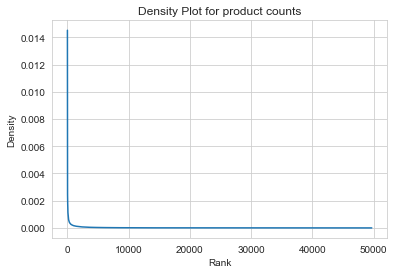

In [15]:
#Calculate the density
productCountDf["density"] = (productCountDf["order_id"]/np.sum(productCountDf["order_id"]))
#Calculate the rank
productCountDf["rank"] = range(productCountDf.shape[0])
plt.plot(productCountDf["rank"],productCountDf["density"])
plt.title("Density Plot for product counts")
plt.xlabel("Rank")
plt.ylabel("Density")

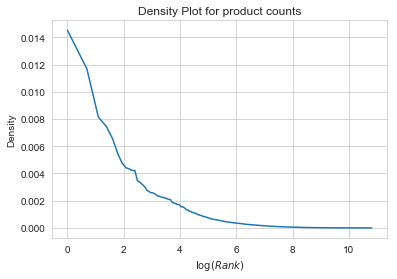

In [16]:
#Calculate log(Rank) also we add 1 to avoid log(0)
productCountDf["logRank"] = np.log(productCountDf["rank"] + 1) 
plt.title("Density Plot for product counts")
plt.xlabel("$\log(Rank)$")
plt.ylabel("Density")
plt.plot(productCountDf["logRank"],productCountDf["density"])

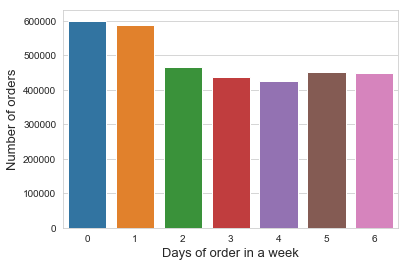

In [17]:
grouped = orderDf.groupby("order_id")["order_dow"].aggregate("sum").reset_index()
grouped = grouped.order_dow.value_counts()

sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Days of order in a week', fontsize=13)
plt.show()